In [426]:
import pandas as pd
# Importing important libraries
import numpy as np
import pandas as pd
import re
from datetime import datetime,date,time
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)

In [427]:
df=pd.read_csv('data_problem_1.csv')

In [428]:
df['order_pickedup_time']=pd.to_datetime(df['order_pickedup_time'])
df['order_delivered_time']=pd.to_datetime(df['order_delivered_time'])

In [429]:
df['eta']=(df['order_delivered_time']-df['order_pickedup_time'])

In [430]:
fintime=[]
for i in range(df.shape[0]):
    fintime.append(df['eta'][i].total_seconds()/60)

In [431]:
df['complete_eta']=fintime

In [432]:
EARTH_RADIUS = 6371


def haversine(start_lon, start_lat, end_lon, end_lat):
    start_lon = np.radians(start_lon)
    start_lat = np.radians(start_lat)
    end_lon = np.radians(end_lon)
    end_lat = np.radians(end_lat)

    dlon = end_lon - start_lon
    dlat = end_lat - start_lat

    a = (np.sin(dlat / 2)**2 + np.cos(start_lat) * np.cos(end_lat) *
         np.sin(dlon / 2)**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return np.nan_to_num(c * EARTH_RADIUS)

In [433]:
import numpy as np
ls=[]
for i in range(df.shape[0]):
    y=haversine(df['R_Lon'][i],df['R_Lat'][i],df['C_Lon'][i],df['C_Lat'][i])
    ls.append(y)
df['dist']=ls 

In [434]:
df['day']=df['order_pickedup_time'].dt.day
df['month']=df['order_pickedup_time'].dt.month
df['hour']=df['order_pickedup_time'].dt.hour
df['minute']=df['order_pickedup_time'].dt.minute
df['week']=df['order_pickedup_time'].dt.week

In [435]:
from geopy.distance import vincenty
dis=[]
for i in range(df.shape[0]):
    newport_ri = (df['R_Lon'][i],df['R_Lat'][i])
    cleveland_oh = (df['C_Lon'][i], df['C_Lat'][i])
    dis.append((vincenty(newport_ri, cleveland_oh).km))

In [436]:
df['dis']=dis

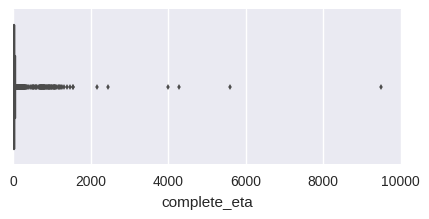

In [437]:
fig, ax = plt.subplots(figsize=(5,2))
sns.boxplot(x = 'complete_eta', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, ax = ax)
plt.show()

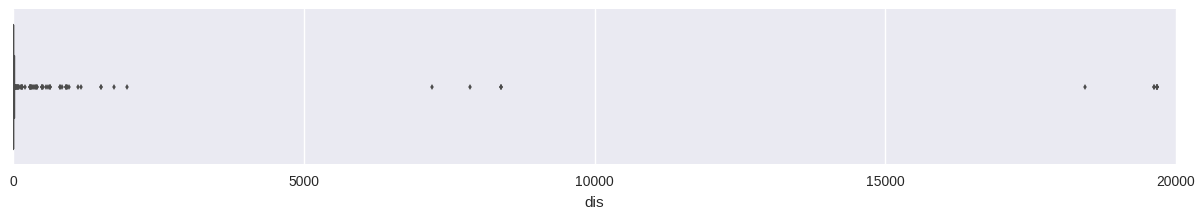

In [438]:
fig, ax = plt.subplots(figsize=(15,2))
sns.boxplot(x = 'dis', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, ax = ax)
plt.show()

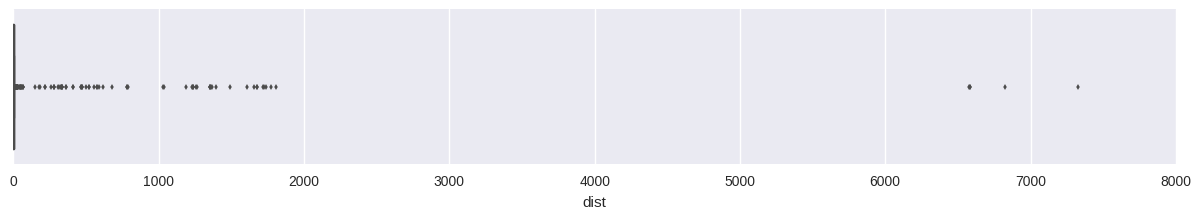

In [439]:
fig, ax = plt.subplots(figsize=(15,2))
sns.boxplot(x = 'dist', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, ax = ax)
plt.show()

In [440]:
df.describe()

,R_Lon,R_Lat,C_Lon,C_Lat,eta,complete_eta,dist,day,month,hour,minute,week,dis
count,237373.000000,237373.000000,237373.000000,237373.000000,237373,237373.000000,237373.000000,237373.000000,237373.000000,237373.000000,237373.000000,237373.000000,237373.000000
mean,78.976819,20.595245,78.975780,20.594219,0 days 00:18:47.333037,18.788884,1.894879,16.099936,6.938805,11.979922,29.259174,28.040042,2.098440
std,3.421235,6.204799,3.432772,6.205044,0 days 00:33:38.787549,33.646459,34.995188,8.849625,1.399386,3.528053,17.350184,6.028997,126.266960
min,12.934216,12.875971,2.295038,9.394837,0 days 00:00:00,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,16.000000,0.000000
25%,77.199208,17.400000,77.202206,17.397975,0 days 00:10:30,10.500000,0.664448,8.000000,6.000000,8.000000,14.000000,23.000000,0.350369
50%,78.358395,17.468478,78.354377,17.468799,0 days 00:16:38,16.633333,1.374802,17.000000,7.000000,13.000000,29.000000,28.000000,0.807824
75%,78.462361,28.468983,78.462728,28.465918,0 days 00:23:57,23.950000,2.179799,24.000000,8.000000,15.000000,44.000000,33.000000,1.514261
max,88.433560,28.671119,91.765675,48.858871,6 days 14:09:53,9489.883333,7329.480554,31.000000,9.000000,23.000000,59.000000,38.000000,19679.540748


In [441]:
df=df[df.complete_eta<80]
df=df[df.dis<=10]
df=df[df.dist<=10]

In [442]:
df=df.reset_index()

In [443]:
from sklearn import preprocessing
xy_scaler=preprocessing.StandardScaler() 
xy_scaler.fit(df[["R_Lon","R_Lat"]]) 
df[["R_Lon","R_Lat"]]=xy_scaler.transform(df[["R_Lon","R_Lat"]])
df[["C_Lon","C_Lat"]]=xy_scaler.transform(df[["C_Lon","C_Lat"]])

In [450]:
df["rot45_pickup_latitude"] = .707* df["R_Lon"] + .707* df["R_Lat"] 
df["rot45_pickup_longitude"] = .707* df["R_Lon"] - .707* df["R_Lat"]
df["rot45_dropoff_latitude"] = .707* df["C_Lon"] + .707* df["C_Lat"] 
df["rot45_dropoff_longitude"] = .707* df["C_Lon"] - .707* df["C_Lat"]
df["rot30_X"] = (1.732/2)* df["R_Lat"] + (1./2)* df["R_Lon"] 
df["rot30_Y"] = (1.732/2)* df["R_Lon"] - (1./2)* df["R_Lat"]
df["rot30_a"] = (1.732/2)* df["C_Lat"] + (1./2)* df["C_Lon"] 
df["rot30_b"] = (1.732/2)* df["C_Lon"] - (1./2)* df["C_Lat"]
df["rot60_X"] = (1./2)* df["C_Lat"] + (1.732/2)* df["C_Lon"] 
df["rot60_Y"] = (1./2)* df["C_Lon"] - (1.732/2)* df["C_Lat"]
df["rot60_a"] = (1./2)* df["R_Lat"] + (1.732/2)* df["R_Lon"] 
df["rot60_b"] = (1./2)* df["R_Lon"] - (1.732/2)* df["R_Lat"]
df["radial_r"] = np.sqrt( np.power(df["R_Lon"],2) + np.power(df["R_Lat"],2) )
df["radial_r1"] = np.sqrt( np.power(df["C_Lon"],2) + np.power(df["C_Lat"],2) )

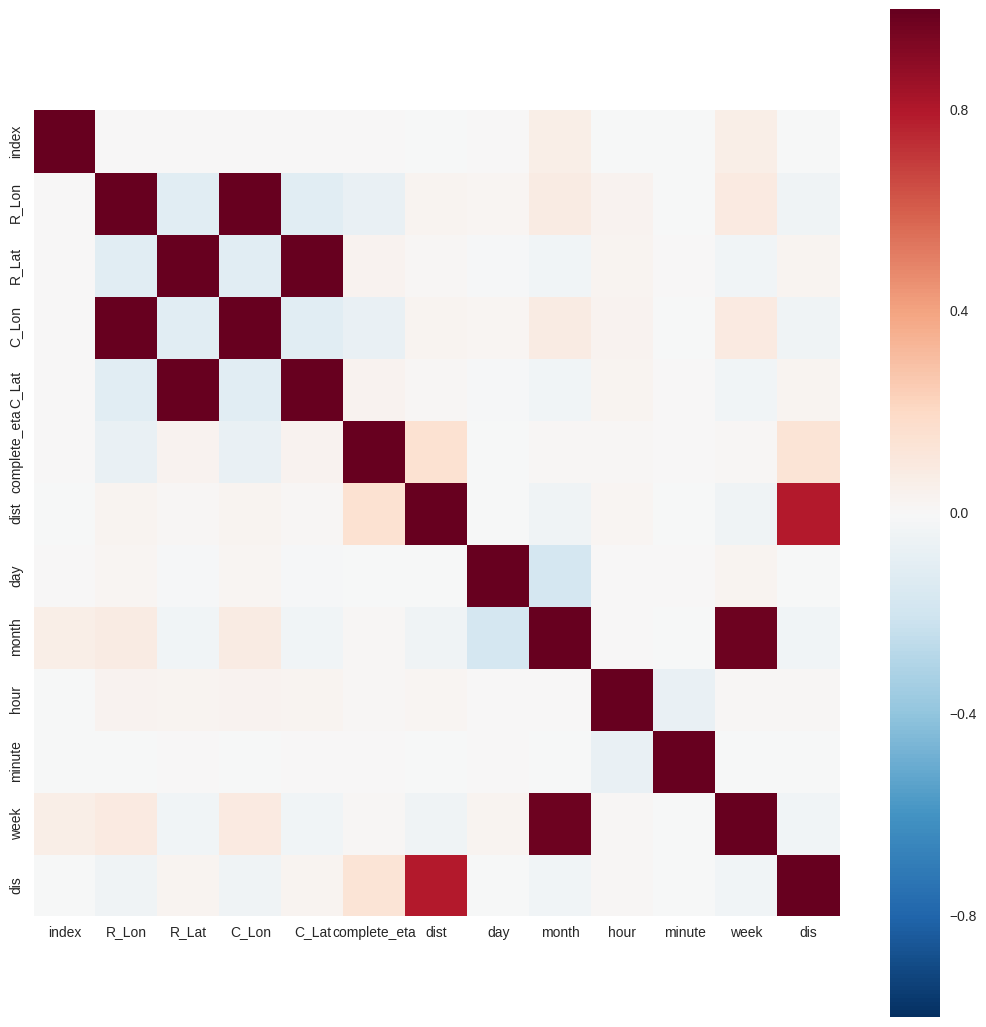

In [445]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:].corr()
plt.figure(figsize=(13, 13))
sns.heatmap(corr, vmax=1, square=True)

In [446]:
cor_dict = corr['complete_eta'].to_dict()
del cor_dict['complete_eta']
print("List the numerical features decendingly by their correlation with ndTemp:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))


List the numerical features decendingly by their correlation with ndTemp:

dist: 	0.153642485594
dis: 	0.132988509943
R_Lon: 	-0.0772706116336
C_Lon: 	-0.0772515366747
R_Lat: 	0.0325289923047
C_Lat: 	0.0325035355822
hour: 	0.0110697859034
week: 	0.00862734767154
month: 	0.00790324123637
index: 	0.00207352780077
minute: 	0.00189777505416
day: 	-0.000854623662402


In [447]:
del df['order_id']
del df['order_delivered_time']
del df['order_pickedup_time']
del df['eta']
del df['index']

In [448]:
y=df['complete_eta']
del df['complete_eta']
y_train=y[0:200000]
y_test=y[200000:]
X_train=df[0:200000]
X_test=df[200000:]

In [461]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(verbose=10,solver='sgd',early_stopping=True)
model.fit(X_train,y_train)

Iteration 1, loss = 81.08641968
Validation score: 0.013022
Iteration 2, loss = 69.10906608
Validation score: 0.022721
Iteration 3, loss = 68.34651947
Validation score: 0.031212
Iteration 4, loss = 68.15222430
Validation score: 0.020249
Iteration 5, loss = 67.98831673
Validation score: 0.029222
Iteration 6, loss = 67.88005205
Validation score: 0.019198
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=10, warm_start=False)

In [374]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(X_test),y_test)

8.78994473526609

In [359]:
model.predict(X_test)

array([ 18.16793546,  18.59090025,  17.9340339 , ...,  21.02888246,
        19.3733771 ,  19.06864814])

In [360]:
import xgboost as xgb
model=xgb.XGBRegressor(n_estimators=500)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [459]:
import xgboost as xgb
param = {}
param['objective'] = 'reg:linear'
param['eval_metric'] = 'mae'
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)
bst = xgb.train( param, dtrain,190)

In [468]:
mean_absolute_error(bst.predict(dtest),y_test)

8.018992787255339